In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

c:\users\dipanshu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\dipanshu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

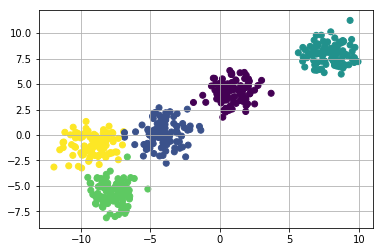

In [9]:
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [15]:
k=5

color = ["green", "red","blue","yellow","orange"]

clusters={}
for i in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    
    
    points=[]
    
    cluster ={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster


In [16]:
clusters

{0: {'center': array([-0.63374755,  5.39998154]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 3.57464397, -3.34688616]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-2.90224053,  4.65948201]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 6.79906203, -7.17692051]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-1.06964441, -1.4605365 ]),
  'points': [],
  'color': 'orange'}}

In [17]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [24]:
def assignPointToClusterss(clusters):
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]
    
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
    
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="X")

(198, 2)
(0,)
(62, 2)
(0,)
(240, 2)


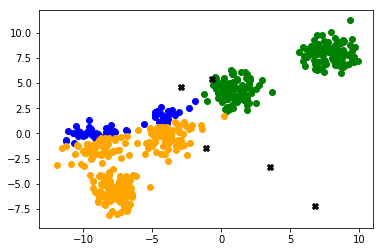

In [25]:
plotClusters(clusters)

(100, 2)
(103, 2)
(160, 2)
(0,)
(137, 2)


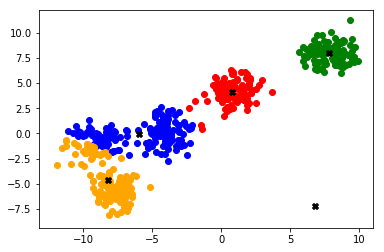

In [39]:
assignPointToClusterss(clusters)
plotClusters(clusters)
updateClusters(clusters)
# re performing this step again and again makes the centre fit the data..
# the times for which the steps have to be re done depends on that data..

In [40]:
# this algo is stuck in case of local minima where there is no points alloted for one of the cluster due to our random initilisation

In [41]:
#improve initiatization to make it work better

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
centers = kmeans.cluster_centers_

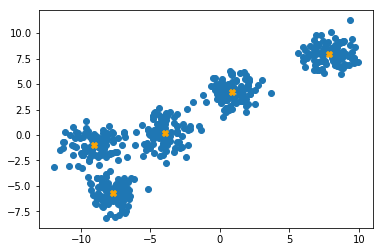

In [48]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(centers[:,0],centers[:,1],marker="X",color='orange')
plt.show()

In [49]:
pred = kmeans.labels_

In [50]:
print(pred)

[2 3 4 2 2 4 0 2 3 2 3 4 3 2 4 2 3 2 2 3 1 1 2 4 2 1 0 0 4 0 2 0 1 1 2 1 3
 3 2 1 1 1 0 0 4 3 3 0 0 0 3 2 0 2 2 1 2 2 3 4 3 4 4 2 0 3 4 4 1 4 1 2 1 2
 1 4 2 0 1 1 4 1 4 0 3 0 4 3 0 4 0 1 2 1 1 3 2 4 4 1 3 1 4 4 3 3 3 4 4 2 3
 0 2 3 4 1 3 0 1 4 3 4 0 2 1 0 0 0 2 2 4 4 2 3 3 0 4 0 4 2 2 1 4 3 0 2 3 3
 2 4 2 2 4 4 3 1 1 0 4 2 1 3 0 1 3 1 3 1 1 1 0 2 1 3 1 0 2 4 3 0 3 2 3 1 0
 0 1 2 4 3 1 4 0 2 0 1 4 0 2 2 2 1 1 3 2 0 0 2 3 2 2 2 1 3 4 3 2 2 3 0 4 0
 0 1 2 4 2 4 0 1 4 4 2 1 2 1 4 3 4 1 1 3 2 2 4 4 1 3 1 2 0 3 0 2 0 0 0 0 3
 1 3 2 1 3 0 4 3 3 3 0 2 2 4 1 1 3 4 4 2 4 0 4 3 3 0 0 1 0 0 3 1 2 4 1 4 0
 4 4 3 2 1 3 1 1 2 0 1 4 1 0 2 2 4 3 1 0 3 1 4 0 3 0 2 1 0 4 4 1 1 1 2 0 1
 2 3 4 4 0 3 3 4 4 0 1 1 1 2 0 3 0 2 1 3 3 4 1 1 0 1 0 4 4 4 0 1 2 1 4 0 0
 3 2 3 0 2 0 4 3 1 3 4 2 2 3 3 1 3 1 0 4 3 0 2 2 3 4 1 0 2 2 2 0 3 1 3 3 3
 0 1 4 3 4 4 0 4 2 4 2 3 1 1 2 3 0 2 1 4 3 0 4 0 0 3 0 4 0 3 0 4 0 2 1 1 0
 1 3 1 1 0 2 2 4 0 1 4 0 4 3 4 3 2 1 4 2 4 2 2 1 2 1 0 3 3 4 2 2 0 0 3 0 0
 3 0 3 3 3 0 1 0 4 3 4 4 

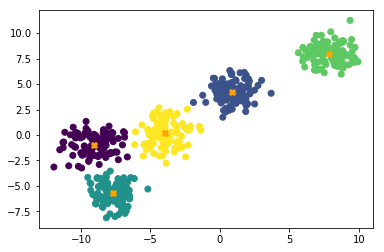

In [52]:
plt.scatter(x[:,0],x[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker="X",color='orange')
plt.show()

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles,make_moons

In [60]:

X,Y = make_moons(n_samples=200,noise=0.10)
dbs = DBSCAN(eps=0.2,min_samples=5)

In [61]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [66]:
y_pred = dbs.fit_predict(X)
print(Y)
print(y_pred)

[1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1]
[ 0  1  0  1  0  1  1  1  0  1  1  1  0  1  1  1  0  0 -1  0  0  0  1  1
  0  1  0  1  0  1  1  0  0  1  0  0  0  0  1  1  0  0  1  1  1  0  0  1
  1  1  0  1  1  0  0  1  0  1  0  1  0  1  0 -1  0  1  1  0  1  1  1  1
  0  1  0  0  1  1  1  0  1  0  0  1  1  1 -1  1  1  1  1  0  0  1  1  1
  0  0  0  0  1  1  0  0  0  0  1  1  1  0  1  0  0  0  1  1  1  1  0  1
  0  1  1  0  0  1  1  1  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  1
  1  1  0  1  0  1  1  1  0  1  0  1  0  1 -1  0  1  0  0  1  0  0  1  1
  1  0  1  0  0  1  0  1  1  0  1  1  0  0  0  0  1  0  0  0  0  0  1  1
  0  0  0

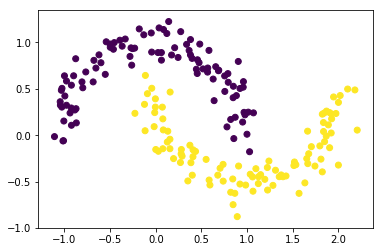

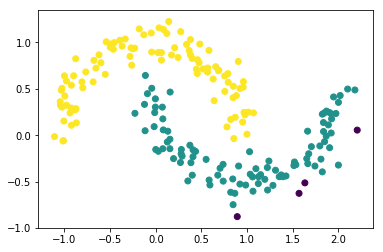

In [64]:

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()